In [50]:
import itertools
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,10)

In [51]:
import pandas as pd

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
#import results of CNN training
df = pd.read_csv('results/final_cnn_classif.csv')

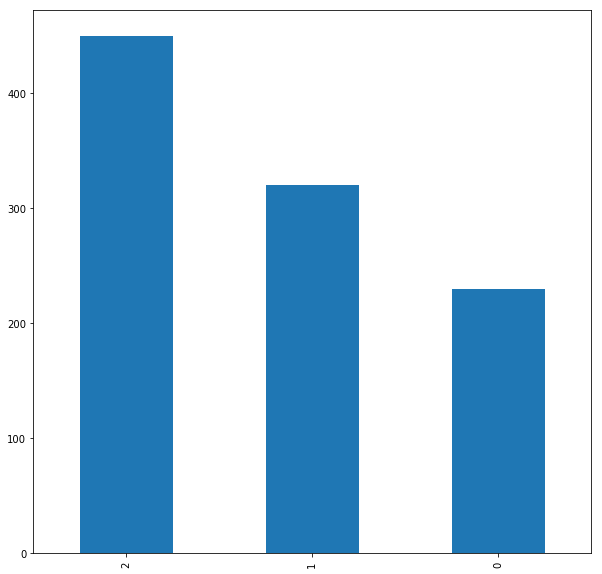

In [54]:
exp = df.expected.value_counts()
exp.plot(kind='bar')

Distribution of anomaly type in testing dataset. 0 = Sphere, 1 = Vertical c., 2 = Horizontal c.

## Confusion matrix for CNN

Confusion matrix, without normalization
[[220   0  10]
 [  0 320   0]
 [  0  14 436]]


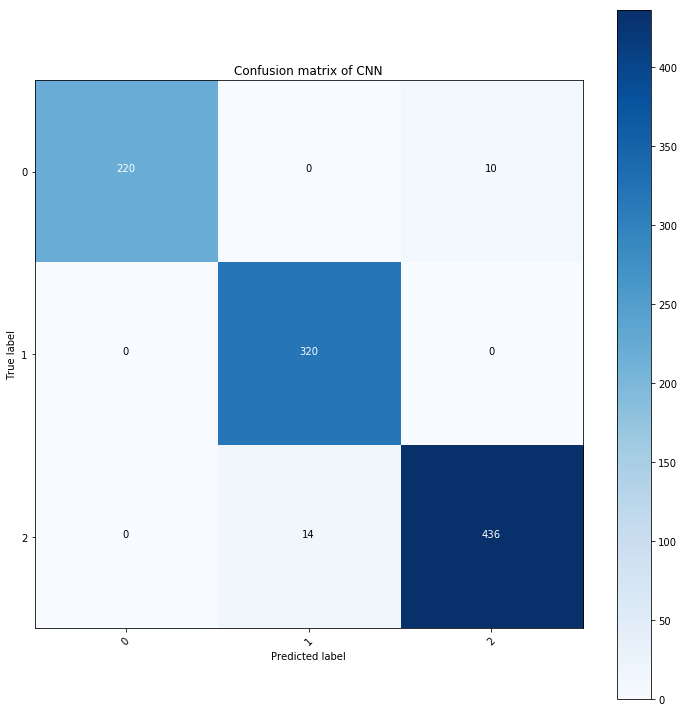

In [55]:
# Compute confusion matrix


cnf_matrix = confusion_matrix(df.expected, df.predicted)
np.set_printoptions(precision=3)
class_names = {0: "Sphere", 1: "Vertical", 2:"Horizontal"}

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix of CNN')

# Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

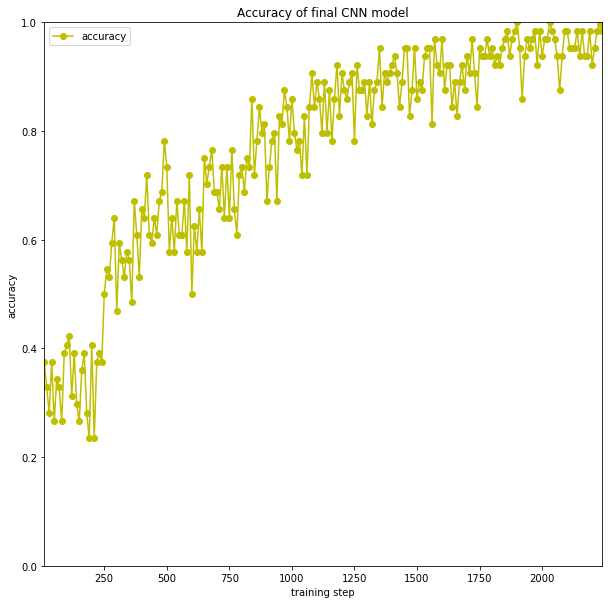

In [56]:
df = pd.read_csv('results/final_cnn_accuracy.csv')
df['step'] = range(10,2250,10)
ax = df.plot(x='step', y='accuracy', ylim=(0,1),style=['yo-'], title='Accuracy of final CNN model')
ax.set_xlabel("training step")
ax.set_ylabel("accuracy")

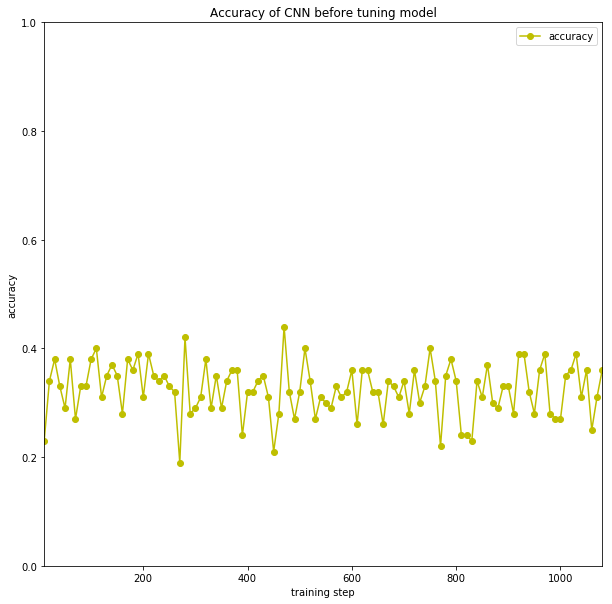

In [76]:
df = pd.read_csv('results/initial_cnn_accuracy.csv')
df['step'] = range(10,1090,10)
ax = df.plot(x='step', y='accuracy', ylim=(0,1),style=['yo-'], title='Accuracy of CNN before tuning model' )
ax.set_xlabel('training step')
ax.set_ylabel('accuracy')

## Confusion matrix for simple model 

Confusion matrix for simple model on testing dataset.

Confusion matrix, without normalization
[[ 71 129  30]
 [ 80 190  50]
 [180 230  40]]


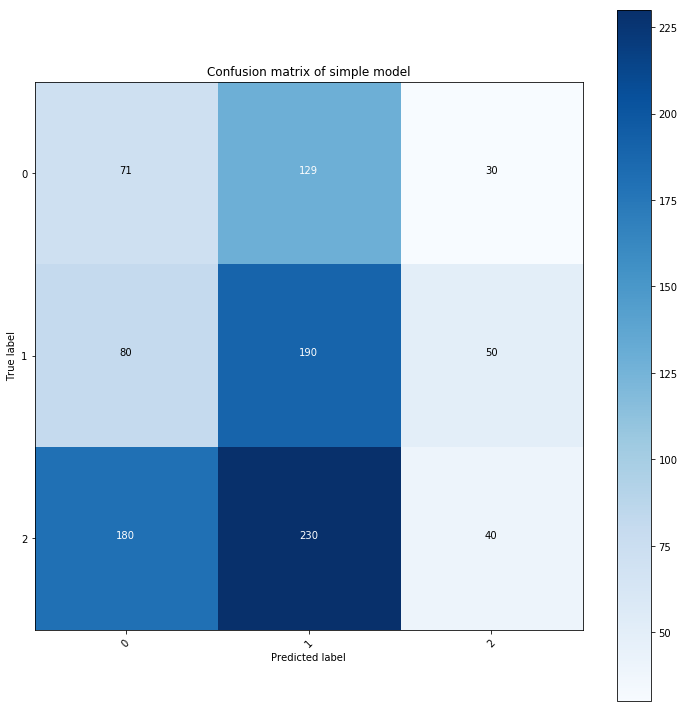

In [75]:
# Compute confusion matrix
df = pd.read_csv('results/simple_model_classif.csv')

cnf_matrix = confusion_matrix(df.expected, df.predicted)
np.set_printoptions(precision=3)
class_names = {0: "Sphere", 1: "Vertical", 2:"Horizontal"}

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix of simple model')

# Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

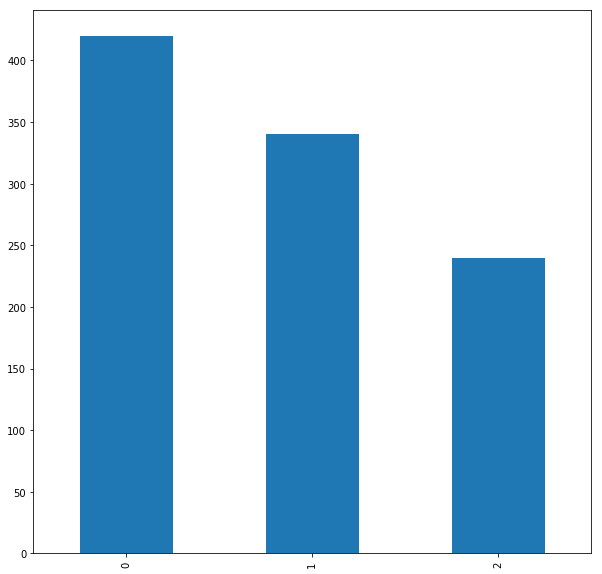

In [74]:
exp = df.expected.value_counts()
exp.plot(kind='bar')

## Accuracy of Simple model on validation set during training

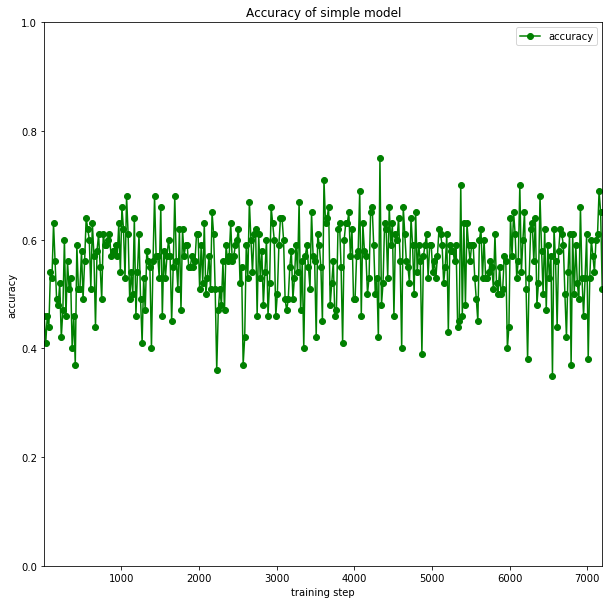

In [59]:
df = pd.read_csv('results/simple_model_accuracy.csv')
df['step'] = range(10, 7200, 20)
ax = df.plot(x='step', y='accuracy', ylim=(0,1), style=['go-'], title='Accuracy of simple model')
ax.set_xlabel("training step")
ax.set_ylabel("accuracy")

In [60]:
import report_data_sample as data_example
sphere = np.array(data_example.sphere)

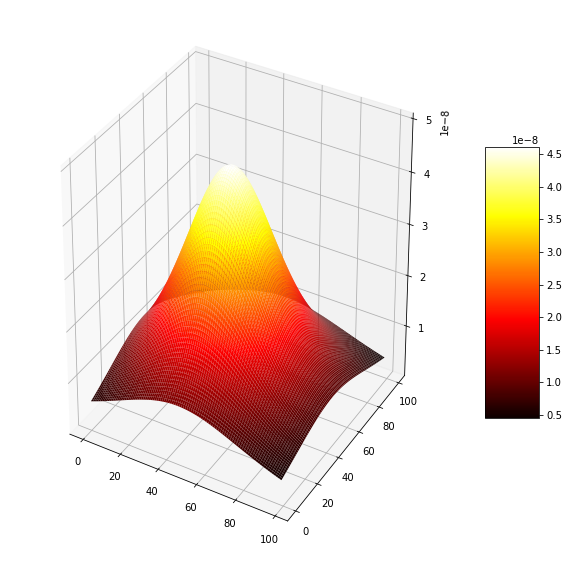

In [61]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(100)
Y = np.arange(100)
X, Y = np.meshgrid(X, Y)
Z = sphere
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
ax.set_zlim(0.000000001, 0.00000005)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [62]:
from sklearn import preprocessing
norm_sphere = preprocessing.normalize(sphere, norm='l2')

norm_sphere.max()

0.15200169783805456

In [63]:
norm_sphere.min()

0.030071573638906307

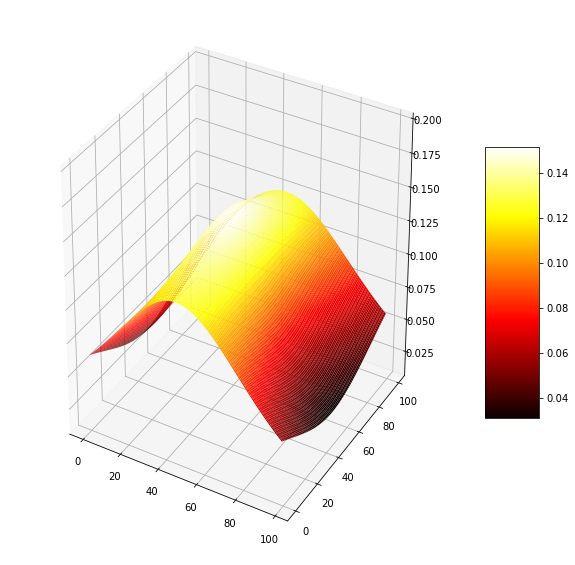

In [64]:
X = np.arange(100)
Y = np.arange(100)
X, Y = np.meshgrid(X, Y)
Z = norm_sphere
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
ax.set_zlim(0.01, 0.2)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [65]:
vertical = np.array(data_example.vertical)
vertical.min()

1.700565e-06

In [66]:
norm_vertical = preprocessing.normalize(vertical, norm='l2')
norm_vertical.max()

0.15456374408974383

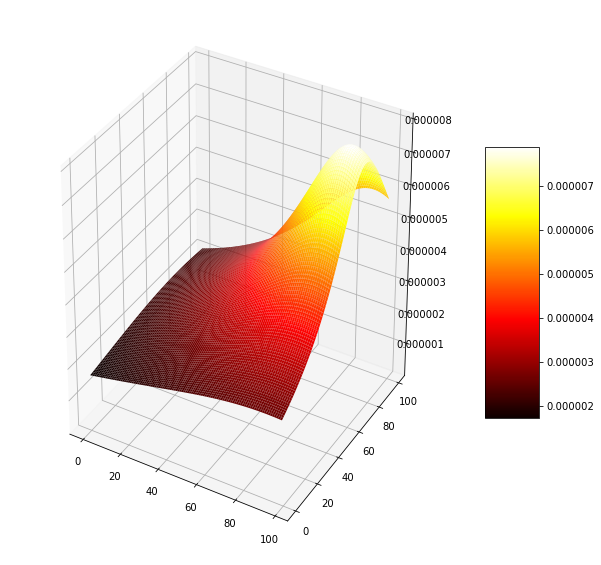

In [67]:
X = np.arange(100)
Y = np.arange(100)
X, Y = np.meshgrid(X, Y)
Z = vertical
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
ax.set_zlim(0.0000001, 0.000008)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

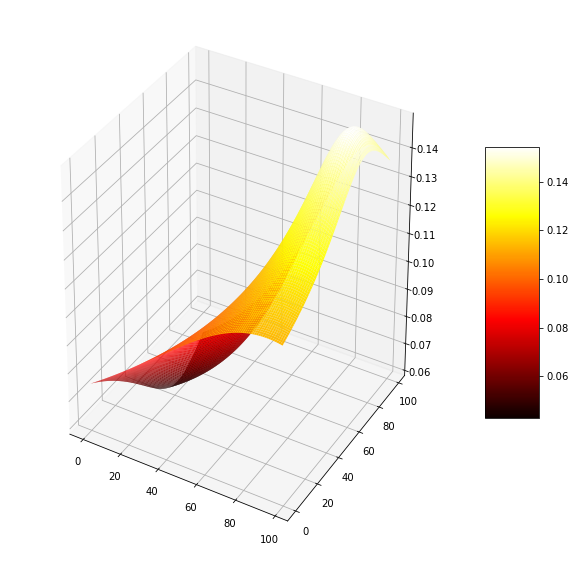

In [68]:
X = np.arange(100)
Y = np.arange(100)
X, Y = np.meshgrid(X, Y)
Z = norm_vertical
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
ax.set_zlim(0.06, 0.15)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [69]:
horizontal = np.array(data_example.horizontal)
horizontal.min()

2.2980004200000001e-06

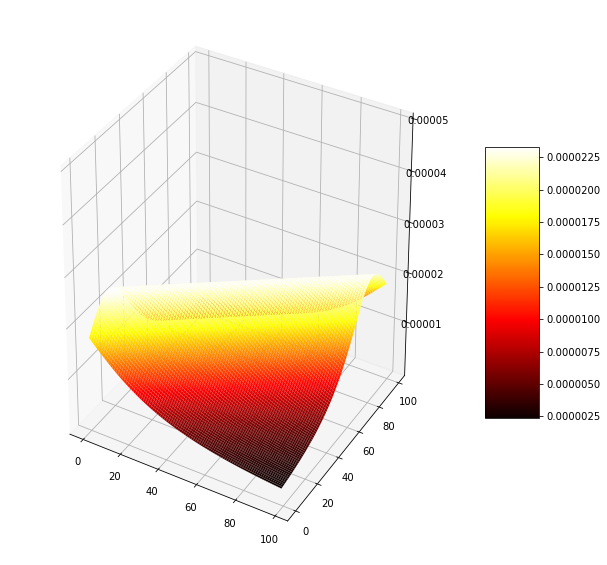

In [70]:
X = np.arange(100)
Y = np.arange(100)
X, Y = np.meshgrid(X, Y)
Z = horizontal
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
ax.set_zlim(0.00000001, 0.00005)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [71]:
norm_horizontal = preprocessing.normalize(horizontal, norm='l2')
norm_horizontal.max()

0.21408986160816074

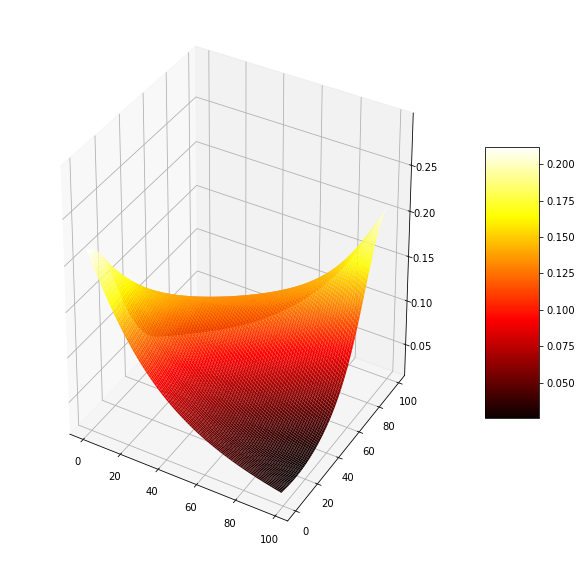

In [72]:
X = np.arange(100)
Y = np.arange(100)
X, Y = np.meshgrid(X, Y)
Z = norm_horizontal
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
ax.set_zlim(0.02, 0.3)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()